In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 2. Load dataset (binary classification example)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Baseline model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# 4. Compare with other models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    })

results_df = pd.DataFrame(results)
print(results_df)

# 5. Trade-off analysis
# Show interpretability vs. performance


/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in 

Logistic Regression Accuracy: 0.956140350877193
F1 Score: 0.9655172413793104
               Model  Accuracy        F1   ROC-AUC
0      Random Forest  0.964912  0.972222  0.996069
1  Gradient Boosting  0.956140  0.965035  0.995087
2     Neural Network  0.973684  0.978723  0.998690


/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/amandeepsin

In [ ]:
accuracy = (True Positives + True Negatives) / Total Predictions
F1_Score = "The harmonic mean of Precision (avoiding False Positives) and Recall (finding all positives). -> F1 = 2 * (Precision * Recall) / (Precision + Recall)"
ROC-AUC = "Measures the ability of the model to distinguish between classes. Higher is better.ROC-AUC = Area under the Receiver Operating Characteristic curve"


"""
High Accuracy, Low F1: Your model is great at predicting the majority class (often negative cases) but fails at identifying the minority (positive) class, or vice-versa, often due to class imbalance.
High F1 (and Accuracy): Indicates strong performance across both Precision and Recall, meaning it finds most positives without many false alarms, even with class imbalance. 
Example: Fraud Detection
Accuracy: A model predicts no fraud, gets 99% accuracy (if only 1% is fraud) sounds good, but misses all fraud.
F1 Score: A model that correctly flags most fraud (high Recall) and flags very few legitimate transactions as fraud (high Precision) will have a high F1, making it a truly effective fraud detector. 
When to Use Which:
Use Accuracy: When classes are balanced and both types of errors (FP/FN) are equally important/costly, or when the negative class is important too.
Use F1 Score: When classes are imbalanced, false positives and false negatives are both critical (e.g., medical diagnosis, spam, fraud)."""

SyntaxError: invalid syntax (1707480391.py, line 1)

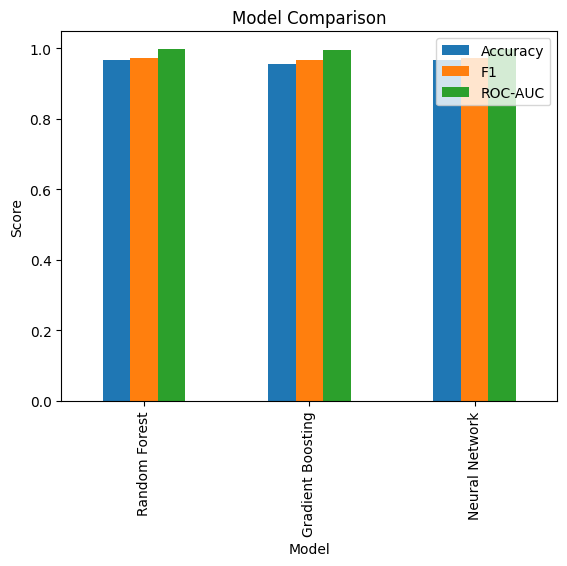

In [3]:
import matplotlib.pyplot as plt

results_df.set_index("Model")[["Accuracy","F1","ROC-AUC"]].plot(kind="bar")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()
